<a href="https://colab.research.google.com/github/ehcdc1967/Proyectos-de-Inversion/blob/main/Random_Forest_Balanceado_Vs_Desbalanceado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import ( accuracy_score , roc_auc_score )
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [ ]:
# Leer el archivo de datos
df = pd.read_parquet('https://raw.githubusercontent.com/ehcdc1967/Proyectos-de-Inversion/main/poblacion.parquet')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52415 entries, 0 to 52414
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CODIGO_UNICO             52415 non-null  object  
 1   SOBRECOSTO               52415 non-null  float64 
 2   FUNCION                  52415 non-null  object  
 3   TIEMPO_VIABILIDAD        52415 non-null  float64 
 4   TIEMPO_EJECUCION         52415 non-null  float64 
 5   BENEFICIARIO             52415 non-null  float64 
 6   CTRL_CONCURR             52415 non-null  float64 
 7   MONTO_LAUDO              52415 non-null  float64 
 8   NATURALEZA_MEJORAMIENTO  52415 non-null  float64 
 9   NATURALEZA_AMPLIACION    52415 non-null  float64 
 10  NATURALEZA_RECUPERACION  52415 non-null  float64 
 11  NATURALEZA_CREACION      52415 non-null  float64 
 12  MODALIDAD_DIRECTA        52415 non-null  float64 
 13  MODALIDAD_INDIRECTA      52415 non-null  float64 
 14  MODIFI

In [ ]:
# Eliminar columnas irrelevantes y manejar valores faltantes
df.drop(columns=['CODIGO_UNICO'], inplace=True, errors='ignore')
df.dropna(inplace=True)

In [ ]:
# One-Hot Encoding para variables categóricas
df = pd.get_dummies(df, columns=['FUNCION', 'DPTO', 'TIPO_MUNICIPALIDAD'], drop_first=True)

In [ ]:
# Separar características (X) y objetivo (y)
if 'SOBRECOSTO' not in df.columns:
    raise ValueError("La columna objetivo 'SOBRECOSTO' no está en los datos.")

In [ ]:
X = df.drop(columns=['SOBRECOSTO'], errors='ignore')
y = df['SOBRECOSTO']

In [ ]:
# Estandarizar las variables continuas
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
df.head()

,CODIGO_UNICO,SOBRECOSTO,TIEMPO_VIABILIDAD,TIEMPO_EJECUCION,BENEFICIARIO,CTRL_CONCURR,MONTO_LAUDO,NATURALEZA_MEJORAMIENTO,NATURALEZA_AMPLIACION,NATURALEZA_RECUPERACION,...,DPTO_SAN MARTIN,DPTO_TACNA,DPTO_TUMBES,DPTO_UCAYALI,TIPO_MUNICIPALIDAD_B,TIPO_MUNICIPALIDAD_C,TIPO_MUNICIPALIDAD_D,TIPO_MUNICIPALIDAD_E,TIPO_MUNICIPALIDAD_F,TIPO_MUNICIPALIDAD_G
0,2596886,0.0,11.0,700.0,2195.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,True
1,2546333,0.0,4.0,153.0,2032.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
2,2572657,1.0,7.0,275.0,3873.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,2570164,0.0,1.0,90.0,276.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,2576889,0.0,25.0,396.0,1663.0,0.0,0.0,1.0,0.0,0.0,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
# Configurar validación cruzada
kf = StratifiedKFold( n_splits=5 , shuffle=True , random_state=2024 )


**StratifiedKFold:**
*   Es una clase de scikit-learn utilizada para dividir un conjunto de datos en "folds" o particiones para realizar validación cruzada.
*   A diferencia de KFold estándar, en StratifiedKFold las particiones generadas preservan la proporción de las clases en el conjunto de datos original. Esto es especialmente útil en problemas de clasificación, donde las clases pueden estar desbalanceadas.



**n_splits=5**:
*   Indica el número de "folds" o divisiones que se harán en los datos.
*   En este caso, los datos se dividirán en 5 partes: 4 partes se usarán como conjunto de entrenamiento y 1 como conjunto de prueba en cada iteración.




**shuffle=True**:

* Activa la mezcla aleatoria de los datos antes de dividirlos en "folds".
* Esto ayuda a reducir el sesgo introducido por un orden específico en los datos originales.

## **MODELO DESBALANCEADO**

In [ ]:
# Modelo desbalanceado
classifier                 = RandomForestClassifier(random_state=2024)
accuracy_scores_unbalanced = cross_val_score(classifier, X, y, scoring='accuracy', cv=kf )
roc_auc_scores_unbalanced  = cross_val_score(classifier, X, y, scoring='roc_auc' , cv=kf )

In [ ]:
# Entrenamiento completo en datos desbalanceados
classifier.fit(X, y)
train_accuracy_unbalanced = accuracy_score( y , classifier.predict(X) )
train_roc_auc_unbalanced  = roc_auc_score( y , classifier.predict_proba(X)[:, 1] )

In [ ]:
# Balanceo de los datos usando SMOTE
smote = SMOTE(random_state=2024)
X_balanced, y_balanced = smote.fit_resample(X, y)


## **MODELO BALANCEADO**

In [ ]:
# Balanceo de los datos usando SMOTE
smote = SMOTE(random_state=2024)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
# Modelo balanceado
classifier_balanced      = RandomForestClassifier(random_state=2024)
accuracy_scores_balanced = cross_val_score(classifier_balanced, X_balanced, y_balanced, scoring='accuracy', cv=kf)
roc_auc_scores_balanced  = cross_val_score(classifier_balanced, X_balanced, y_balanced, scoring='roc_auc', cv=kf)

In [ ]:
# Entrenamiento completo en datos balanceados
classifier_balanced.fit(X_balanced, y_balanced)
train_accuracy_balanced = accuracy_score(y_balanced, classifier_balanced.predict(X_balanced))
train_roc_auc_balanced  =  roc_auc_score(y_balanced, classifier_balanced.predict_proba(X_balanced)[:, 1])

Promedios de las métricas desbalanceadas

In [ ]:
# Promedios de las métricas
mean_accuracy_unbalanced = np.mean(accuracy_scores_unbalanced)
std_accuracy_unbalanced  = np.std(accuracy_scores_unbalanced)
mean_roc_auc_unbalanced  = np.mean(roc_auc_scores_unbalanced)
std_roc_auc_unbalanced   = np.std(roc_auc_scores_unbalanced)

Promedios de las métricas balanceadas

In [ ]:
mean_accuracy_balanced = np.mean(accuracy_scores_balanced)
std_accuracy_balanced  = np.std(accuracy_scores_balanced)
mean_roc_auc_balanced  = np.mean(roc_auc_scores_balanced)
std_roc_auc_balanced   = np.std(roc_auc_scores_balanced)


In [ ]:
# Mostrar resultados
print("\n=== Validación Cruzada: Modelo Desbalanceado ===")
print(f"Accuracy promedio      : {mean_accuracy_unbalanced:.4f} (std: {std_accuracy_unbalanced:.4f})")
print(f"ROC AUC promedio       : {mean_roc_auc_unbalanced:.4f} (std: {std_roc_auc_unbalanced:.4f})")
print(f"Accuracy entrenamiento : {train_accuracy_unbalanced:.4f}")
print(f"ROC AUC entrenamiento  : {train_roc_auc_unbalanced:.4f}")


=== Validación Cruzada: Modelo Desbalanceado ===
Accuracy promedio      : 0.9825 (std: 0.0008)
ROC AUC promedio       : 0.9982 (std: 0.0003)
Accuracy entrenamiento : 1.0000
ROC AUC entrenamiento  : 1.0000


In [ ]:
print("\n=== Validación Cruzada : Modelo Balanceado ===")
print(f"Accuracy promedio       : {mean_accuracy_balanced:.4f} (std: {std_accuracy_balanced:.4f})")
print(f"ROC AUC promedio        : {mean_roc_auc_balanced:.4f} (std: {std_roc_auc_balanced:.4f})")
print(f"Accuracy entrenamiento  : {train_accuracy_balanced:.4f}")
print(f"ROC AUC entrenamiento   : {train_roc_auc_balanced:.4f}")


=== Validación Cruzada : Modelo Balanceado ===
Accuracy promedio       : 0.9898 (std: 0.0009)
ROC AUC promedio        : 0.9995 (std: 0.0001)
Accuracy entrenamiento  : 1.0000
ROC AUC entrenamiento   : 1.0000


In [ ]:
# Visualización de resultados
labels = ['Desbalanceado', 'Balanceado']
accuracy_means = [mean_accuracy_unbalanced, mean_accuracy_balanced]
roc_auc_means = [mean_roc_auc_unbalanced, mean_roc_auc_balanced]

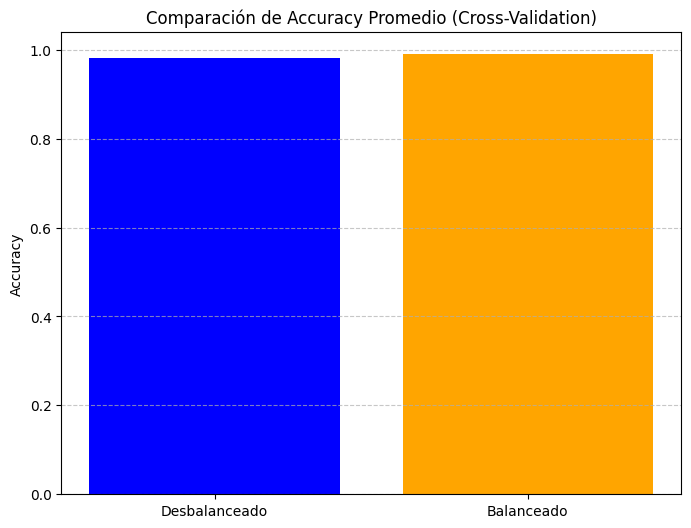

In [ ]:
# Gráfico de barras para Accuracy
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_means, color=['blue', 'orange'])
plt.title('Comparación de Accuracy Promedio (Cross-Validation)')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

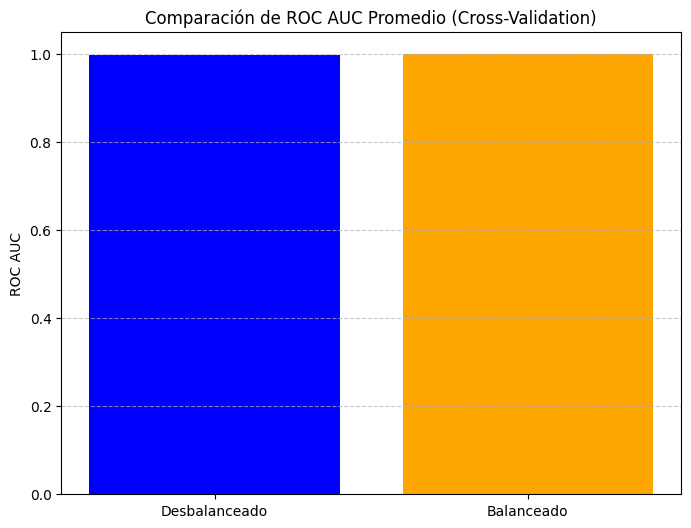

In [ ]:
# Gráfico de barras para ROC AUC
plt.figure(figsize=(8, 6))
plt.bar(labels, roc_auc_means, color=['blue', 'orange'])
plt.title('Comparación de ROC AUC Promedio (Cross-Validation)')
plt.ylabel('ROC AUC')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
